In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.stats import skew, kurtosis
import yfinance as yf


In [2]:
order_type = 'ib'
order_type2 = 'comb'
order_type3 = 'all'

In [3]:
results_ib_2min = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/results_portfolio_{order_type}_momum_2min.csv")
pnl_ib_2min = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/pnl_portfolio_{order_type}_momum_2min.csv")
counts_ib_2min = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/counts_portfolio_{order_type}_momum_2min.csv")

results_ib_30s = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/results_portfolio_{order_type}_momum_30S.csv")
pnl_ib_30s = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/pnl_portfolio_{order_type}_momum_30S.csv")
counts_ib_30s = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/counts_portfolio_{order_type}_momum_30S.csv")

results_ib_10min = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/results_portfolio_{order_type}_momum_10min.csv")
pnl_ib_10min = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/pnl_portfolio_{order_type}_momum_10min.csv")
counts_ib_10min = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/counts_portfolio_{order_type}_momum_10min.csv")


results_comb_2min = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/results_portfolio_{order_type2}_momum_2min.csv")
pnl_comb_2min = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/pnl_portfolio_{order_type2}_momum_2min.csv")
counts_comb_2min = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/counts_portfolio_{order_type2}_momum_2min.csv")

results_comb_30s = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/results_portfolio_{order_type2}_momum_30S.csv")
pnl_comb_30s = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/pnl_portfolio_{order_type2}_momum_30S.csv")
counts_comb_30s = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/counts_portfolio_{order_type2}_momum_30S.csv")

results_comb_10min = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/results_portfolio_{order_type2}_momum_10min.csv")
pnl_comb_10min = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/pnl_portfolio_{order_type2}_momum_10min.csv")
counts_comb_10min = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/counts_portfolio_{order_type2}_momum_10min.csv")


results_all_2min = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/results_portfolio_{order_type3}_momum_2min.csv")
pnl_all_2min = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/pnl_portfolio_{order_type3}_momum_2min.csv")
counts_all_2min = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/counts_portfolio_{order_type3}_momum_2min.csv")

results_all_30s = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/results_portfolio_{order_type3}_momum_30S.csv")
pnl_all_30s = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/pnl_portfolio_{order_type3}_momum_30S.csv")
counts_all_30s = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/counts_portfolio_{order_type3}_momum_30S.csv")

results_all_10min = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/results_portfolio_{order_type3}_momum_10min.csv")
pnl_all_10min = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/pnl_portfolio_{order_type3}_momum_10min.csv")
counts_all_10min = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/counts_portfolio_{order_type3}_momum_10min.csv")


results_comb_2min.set_index("date", inplace=True)
results_comb_30s.set_index("date", inplace=True)
results_comb_10min.set_index("date", inplace=True)

results_ib_2min.set_index("date", inplace=True)
results_ib_30s.set_index("date", inplace=True)
results_ib_10min.set_index("date", inplace=True)

results_all_2min.set_index("date", inplace=True)
results_all_30s.set_index("date", inplace=True)
results_all_10min.set_index("date", inplace=True)

In [6]:
results_lst = [results_comb_30s, results_comb_2min, results_comb_10min, results_ib_30s, results_ib_2min, results_ib_10min,
               results_all_30s, results_all_2min, results_all_10min]
pnl_lst = [pnl_comb_30s, pnl_comb_2min, pnl_comb_10min, pnl_ib_30s, pnl_ib_2min, pnl_ib_10min,
           pnl_all_30s, pnl_all_2min, pnl_all_10min,]
counts_lst = [counts_comb_30s, counts_comb_2min, counts_comb_10min, counts_ib_30s, counts_ib_2min, counts_ib_10min,
              counts_all_30s, counts_all_2min, counts_all_10min,]



label_lst = ['HidLit 30s', 'HidLit 2min', 'HidLit 10min',
             'VHI 30s', 'VHI 2min', 'VHI 10min', 'all 30s', 'all 2min', 'all 10min']

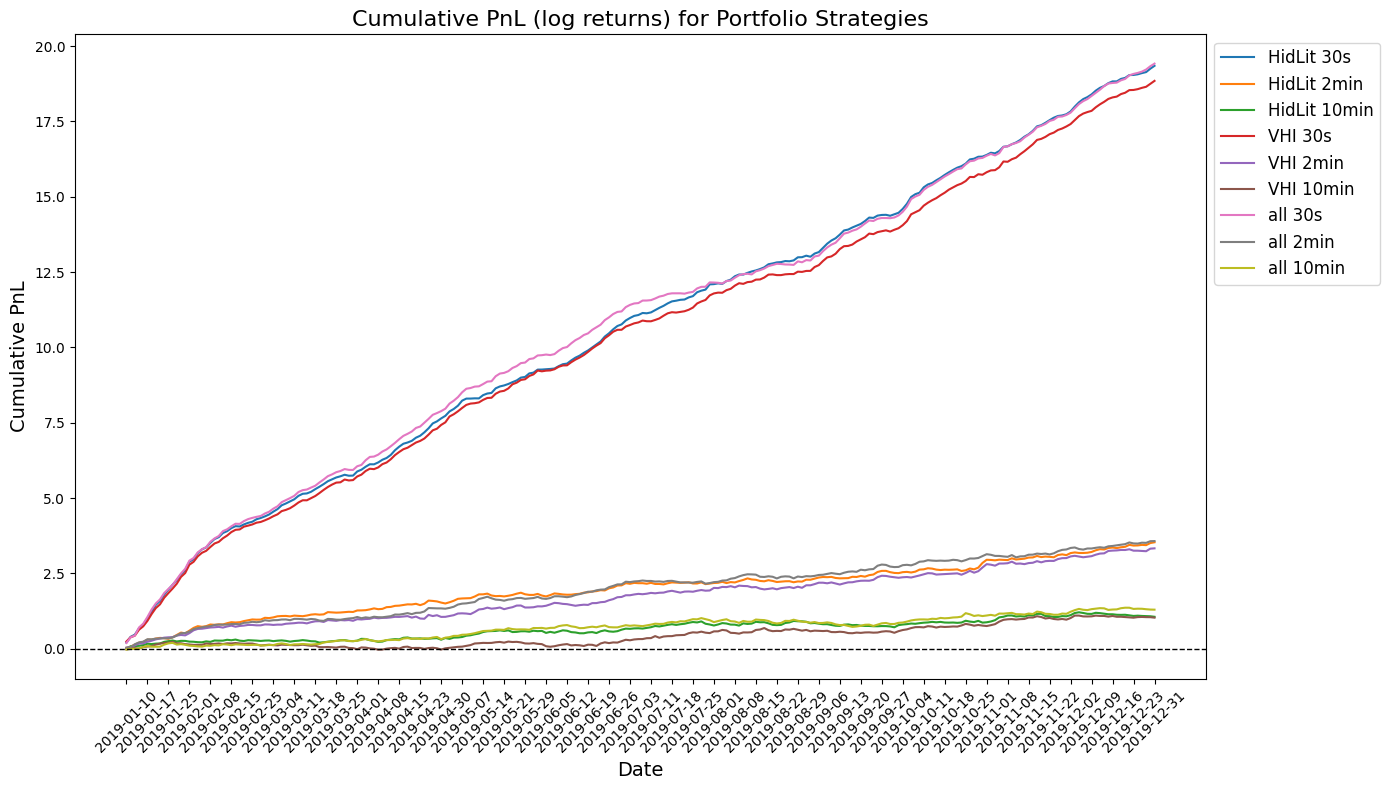

In [7]:
# Plot cumulative PnL for each ticker
plt.figure(figsize=(14, 8))


for results, label in zip(results_lst, label_lst):
    cumulative_pnl = results['PnL'].cumsum().to_frame()
    plt.plot(cumulative_pnl.index, cumulative_pnl['PnL'], label=label)


plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Add title and labels
plt.title('Cumulative PnL (log returns) for Portfolio Strategies', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative PnL', fontsize=14)

# Rotate x-axis labels and reduce ticks
plt.xticks(ticks=range(0, len(cumulative_pnl.index), 5), labels=cumulative_pnl.index[::5], rotation=45)


# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Adjust layout to fit legend
plt.tight_layout()
# Show plot
plt.show()

In [8]:
def sharpe_test(returns, count_df):
    # Calculate the Sharpe ratio
    sharpe_ratio = np.mean(returns) / np.std(returns, ddof=1)
    
    # Number of observations
    T = len(returns)
    
    # Calculate skewness and kurtosis
    g3 = skew(returns)
    g4 = kurtosis(returns, fisher=False)  # fisher=False to match R's kurtosis (which includes the 3)
    
    # Calculate the modified Sharpe ratio statistic
    denominator = np.sqrt((1 - g3 * sharpe_ratio + (g4 - 1) * (sharpe_ratio ** 2) / 4) / (T - 1))
    modified_sharpe_stat = sharpe_ratio / denominator
    # Calculate the two-tailed p-value
    p_value = 2 * min(norm.cdf(modified_sharpe_stat), 1 - norm.cdf(modified_sharpe_stat))
    
    annual_sharpe = sharpe_ratio * np.sqrt(252)
    
    PPT = np.sum(returns) / (count_df[['top_counts', 'bottom_counts']].sum(axis=1).sum()) * 10000
    
    return annual_sharpe, PPT, modified_sharpe_stat, p_value

In [9]:
sharpe_lst = []
SR_test_lst = []
pval_lst = []
ppt_lst = []


for result, counts in zip(results_lst, counts_lst):
    annual_sharpe, PPT, sharpe_stat, p_val = sharpe_test(result['PnL'], counts)
    sharpe_lst.append(annual_sharpe)
    ppt_lst.append(PPT)
    SR_test_lst.append(sharpe_stat)
    pval_lst.append(p_val)

sharpe_df = pd.DataFrame({'Portfolio': label_lst, 'Annual SR': sharpe_lst, 'PPT': ppt_lst,
                          'SR_statistic': SR_test_lst, 'pval': pval_lst})
sharpe_df.sort_values(by='Annual SR', ascending=False, inplace=True)
sharpe_df

,Portfolio,Annual SR,PPT,SR_statistic,pval
0,HidLit 30s,23.376295,0.150538,18.351759,0.000000e+00
3,VHI 30s,22.927529,0.146251,17.165032,0.000000e+00
6,all 30s,22.026151,0.151389,17.772335,0.000000e+00
7,all 2min,7.066923,0.111630,6.735230,1.636713e-11
1,HidLit 2min,6.814622,0.110016,7.024759,2.144285e-12
4,VHI 2min,6.388761,0.102970,6.357141,2.055429e-10
8,all 10min,2.835848,0.207123,2.801629,5.084529e-03
2,HidLit 10min,2.402537,0.168829,2.382458,1.719749e-02
5,VHI 10min,2.322783,0.158998,2.300374,2.142703e-02


## Analysis by Ticker

In [10]:
pnl_lst[0]

,ticker,top_pnl,bottom_pnl,date
0,AES,-0.002479,-0.007342,2019-01-10
1,ALB,0.002176,-0.019678,2019-01-10
2,AOS,-0.001181,-0.000240,2019-01-10
3,APA,0.016392,-0.003138,2019-01-10
4,BEN,-0.001695,-0.005144,2019-01-10
...,...,...,...,...
3955,NWSA,-0.000915,-0.000933,2019-10-22
3956,PNW,0.006312,-0.005530,2019-10-22
3957,RL,0.016745,0.000824,2019-10-22
3958,TAP,0.017097,0.002174,2019-10-22


In [11]:
ticker_SR_lst = []
for df_pnl in pnl_lst:
    df_pnl['overall_pnl'] = df_pnl['top_pnl'] - df_pnl['bottom_pnl']
    grouped = df_pnl.groupby('ticker')['top_pnl'].agg(['mean', 'std'])
    # Calculate the ratio of mean to standard deviation
    grouped['SR'] = grouped['mean'] / grouped['std'] * np.sqrt(252)
    ticker_SR_lst.append(grouped['SR'])


In [12]:
ticker_PPT_lst = []

for df_pnl, df_counts in zip(pnl_lst, counts_lst):
    df_counts['total_counts'] = df_counts['top_counts'] + df_counts['bottom_counts']
    grouped = df_pnl.groupby('ticker')[['top_pnl', 'bottom_pnl']].sum()
    grouped['total_pnl'] = grouped['top_pnl'] - grouped['bottom_pnl']
    grouped_counts = df_counts.groupby('ticker')[['total_counts']].sum()
    grouped = grouped.merge(grouped_counts, left_index=True, right_index=True)
    grouped['PPT'] = grouped['total_pnl'] / grouped['total_counts'] * 10000
    ticker_PPT_lst.append(grouped['PPT'])

In [13]:
ticker_pnl_lst = []

for df_pnl in pnl_lst:
    ticker_result = df_pnl.groupby("ticker")[['top_pnl', 'bottom_pnl']].sum()
    ticker_pnl = ticker_result['top_pnl'] - ticker_result['bottom_pnl']
    ticker_pnl_lst.append(ticker_pnl)

In [14]:
ticker_pnl_lst_comb = ticker_pnl_lst[:3]
ticker_pnl_lst_ib = ticker_pnl_lst[3:]
ticker_pnl_lst_vis = ticker_pnl_lst[3:]


ticker_SR_lst_comb = ticker_SR_lst[:3]
ticker_SR_lst_ib = ticker_SR_lst[3:6]
ticker_SR_lst_vis = ticker_SR_lst[6:]


ticker_PPT_lst_comb = ticker_PPT_lst[:3]
ticker_PPT_lst_ib = ticker_PPT_lst[3:6]
ticker_PPT_lst_vis = ticker_SR_lst[6:]


label_comb = label_lst[:3]
label_ib = label_lst[3:6]
label_vis = label_lst[6:]

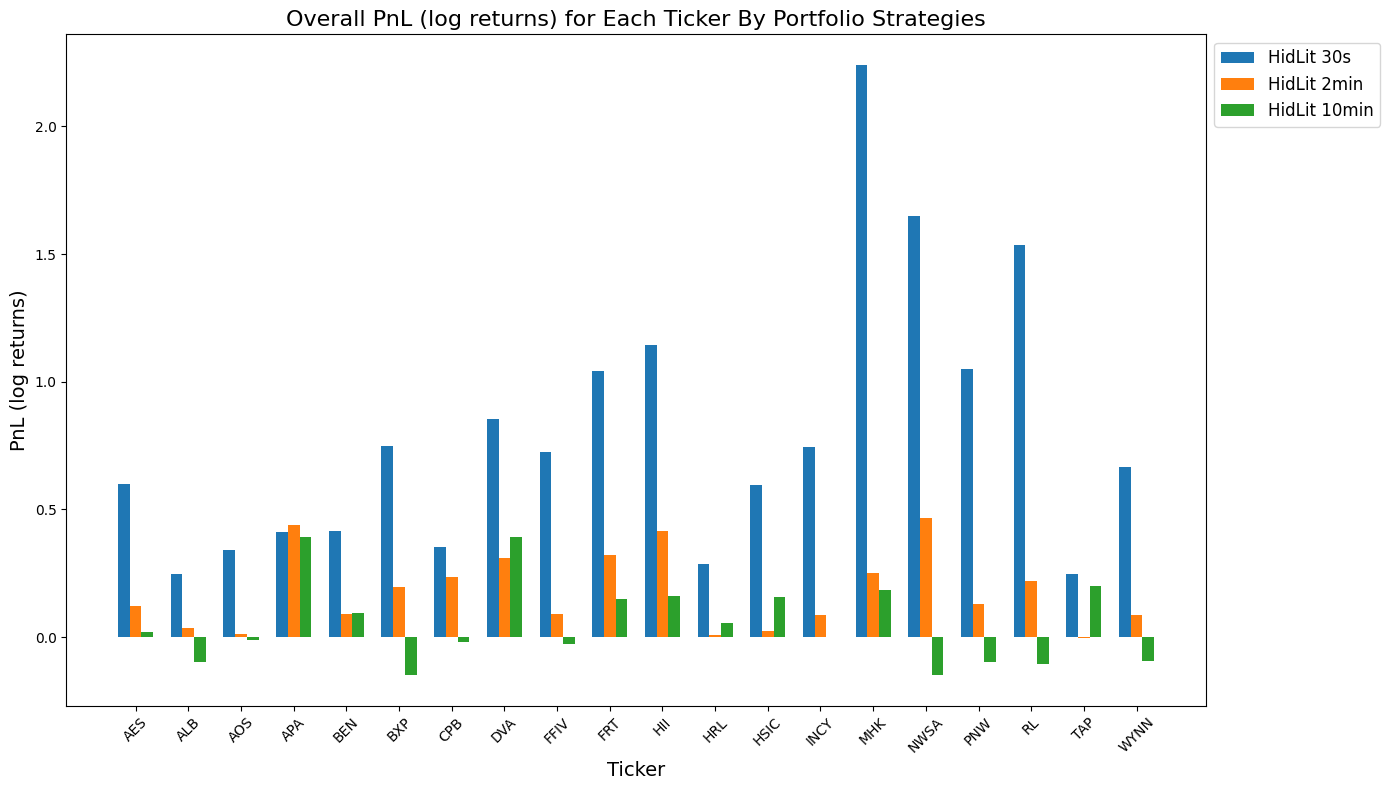

In [15]:
# Assuming ticker_pnl_lst is a list of Series and label_lst is a list of labels corresponding to each series

# Plot cumulative PnL for each ticker
plt.figure(figsize=(14, 8))

# Number of series
n_series = len(ticker_pnl_lst_comb)
# Number of tickers
tickers = ticker_pnl_lst_comb[0].index
n_tickers = len(tickers)

# Set width of bars
bar_width = 0.2
# Increase the gap between tickers
gap = 0.3
# Positions of bars on x-axis for each ticker with additional gap
x = np.arange(n_tickers) * (n_series * bar_width + gap)

# Plot each series as a bar with an offset
for i, (pnl_ticker, label) in enumerate(zip(ticker_pnl_lst_comb, label_comb)):
    plt.bar(x + i * bar_width, pnl_ticker.values, width=bar_width, label=label)

# Add title and labels
plt.title('Overall PnL (log returns) for Each Ticker By Portfolio Strategies', fontsize=16)
plt.xlabel('Ticker', fontsize=14)
plt.ylabel('PnL (log returns)', fontsize=14)

# Set x-ticks to the center of the grouped bars
plt.xticks(x + bar_width * (n_series - 1) / 2, tickers, rotation=45)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Adjust layout to fit legend
plt.tight_layout()

# Show plot
plt.show()


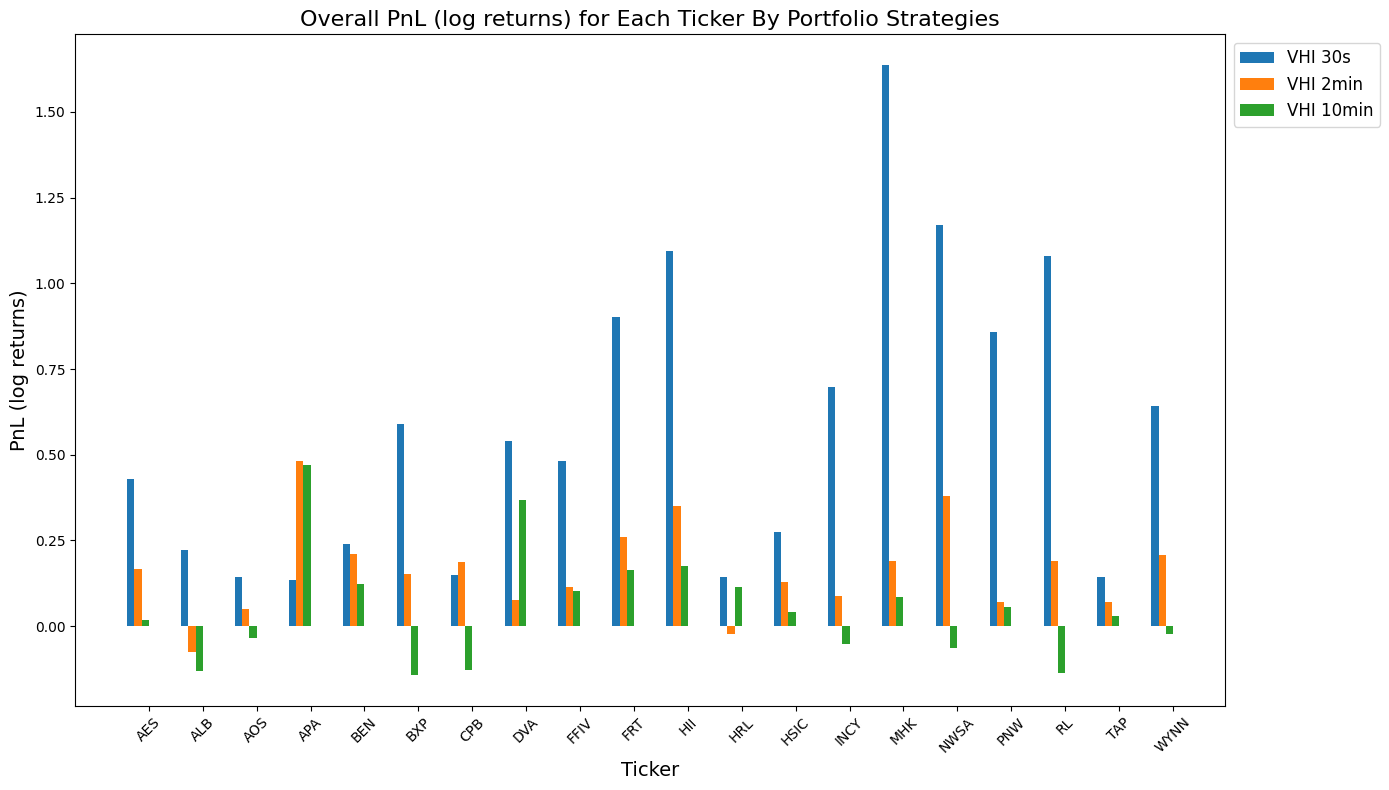

In [16]:
# Plot cumulative PnL for each ticker
plt.figure(figsize=(14, 8))

# Number of series
n_series = len(ticker_pnl_lst_ib)
# Number of tickers
tickers = ticker_pnl_lst_ib[0].index
n_tickers = len(tickers)

# Set width of bars
bar_width = 0.2
# Increase the gap between tickers
gap = 0.3
# Positions of bars on x-axis for each ticker with additional gap
x = np.arange(n_tickers) * (n_series * bar_width + gap)

# Plot each series as a bar with an offset
for i, (pnl_ticker, label) in enumerate(zip(ticker_pnl_lst_ib, label_ib)):
    plt.bar(x + i * bar_width, pnl_ticker.values, width=bar_width, label=label)

# Add title and labels
plt.title('Overall PnL (log returns) for Each Ticker By Portfolio Strategies', fontsize=16)
plt.xlabel('Ticker', fontsize=14)
plt.ylabel('PnL (log returns)', fontsize=14)

# Set x-ticks to the center of the grouped bars
plt.xticks(x + bar_width * (n_series - 1) / 2, tickers, rotation=45)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Adjust layout to fit legend
plt.tight_layout()

# Show plot
plt.show()

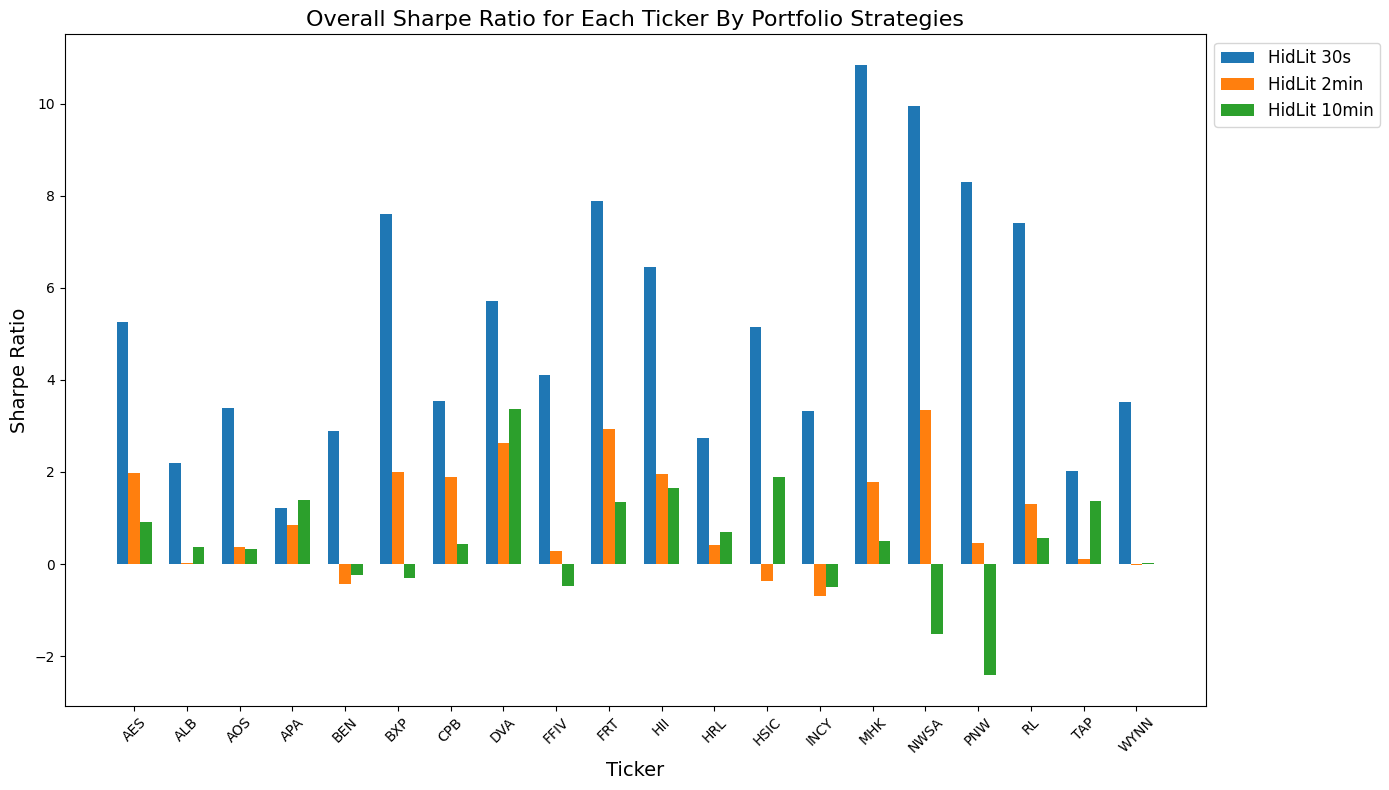

In [17]:
# Plot cumulative PnL for each ticker
plt.figure(figsize=(14, 8))

# Number of series
n_series = len(ticker_SR_lst_comb)
# Number of tickers
tickers = ticker_SR_lst_comb[0].index
n_tickers = len(tickers)

# Set width of bars
bar_width = 0.2
# Increase the gap between tickers
gap = 0.3
# Positions of bars on x-axis for each ticker with additional gap
x = np.arange(n_tickers) * (n_series * bar_width + gap)

# Plot each series as a bar with an offset
for i, (sr_ticker, label) in enumerate(zip(ticker_SR_lst_comb, label_comb)):
    plt.bar(x + i * bar_width, sr_ticker.values, width=bar_width, label=label)

# Add title and labels
plt.title('Overall Sharpe Ratio for Each Ticker By Portfolio Strategies', fontsize=16)
plt.xlabel('Ticker', fontsize=14)
plt.ylabel('Sharpe Ratio', fontsize=14)

# Set x-ticks to the center of the grouped bars
plt.xticks(x + bar_width * (n_series - 1) / 2, tickers, rotation=45)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Adjust layout to fit legend
plt.tight_layout()

# Show plot
plt.show()

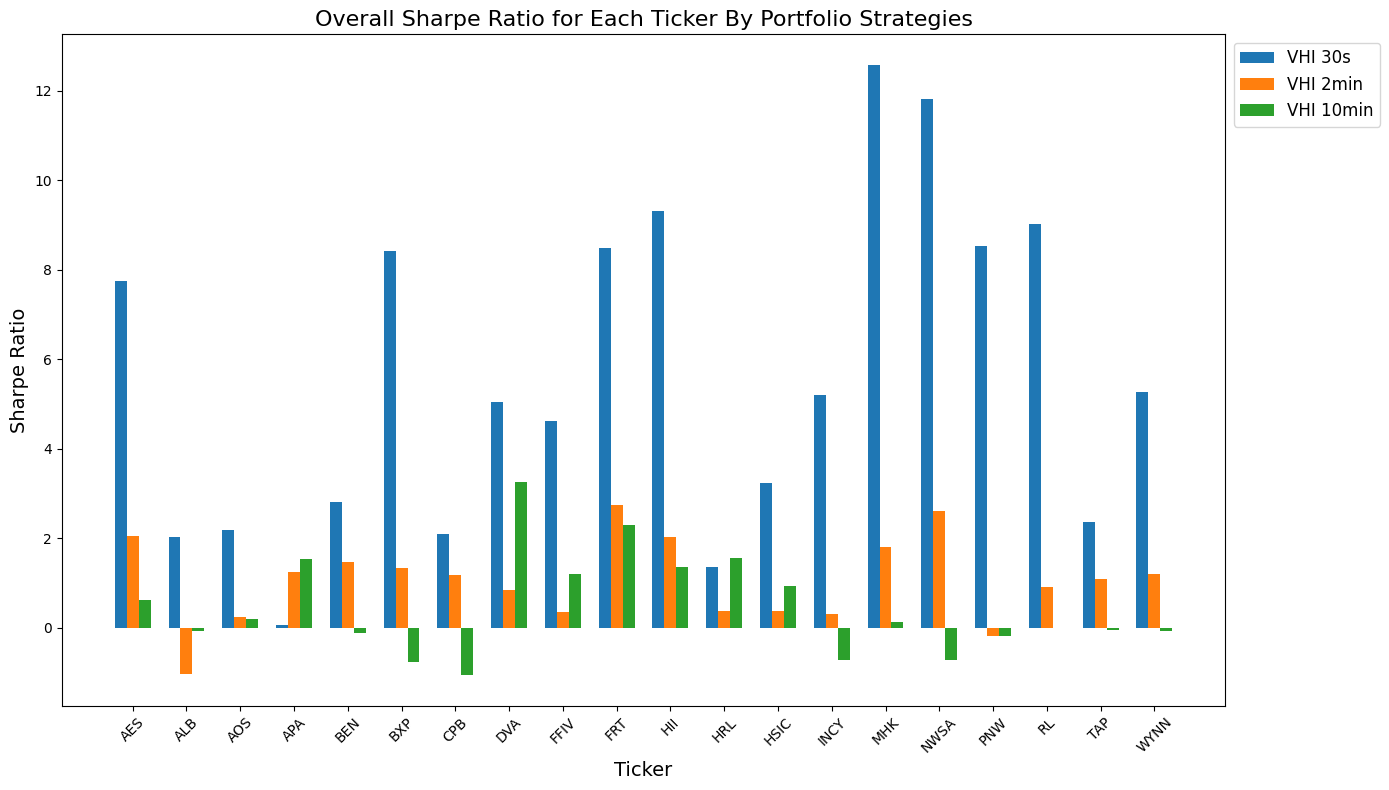

In [18]:
# Plot cumulative PnL for each ticker
plt.figure(figsize=(14, 8))

# Number of series
n_series = len(ticker_SR_lst_ib)
# Number of tickers
tickers = ticker_SR_lst_ib[0].index
n_tickers = len(tickers)

# Set width of bars
bar_width = 0.2
# Increase the gap between tickers
gap = 0.3
# Positions of bars on x-axis for each ticker with additional gap
x = np.arange(n_tickers) * (n_series * bar_width + gap)

# Plot each series as a bar with an offset
for i, (sr_ticker, label) in enumerate(zip(ticker_SR_lst_ib, label_ib)):
    plt.bar(x + i * bar_width, sr_ticker.values, width=bar_width, label=label)

# Add title and labels
plt.title('Overall Sharpe Ratio for Each Ticker By Portfolio Strategies', fontsize=16)
plt.xlabel('Ticker', fontsize=14)
plt.ylabel('Sharpe Ratio', fontsize=14)

# Set x-ticks to the center of the grouped bars
plt.xticks(x + bar_width * (n_series - 1) / 2, tickers, rotation=45)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Adjust layout to fit legend
plt.tight_layout()

# Show plot
plt.show()

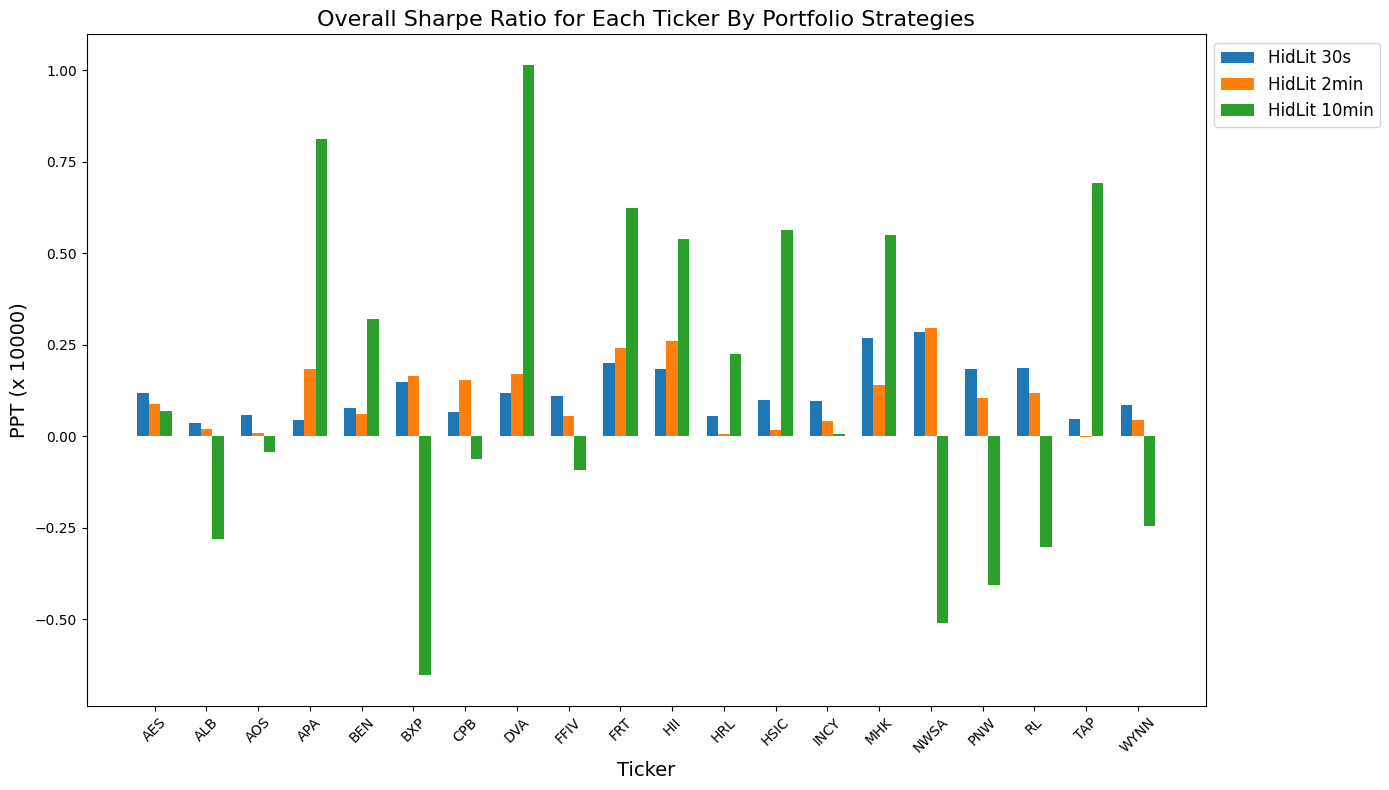

In [19]:
# Plot cumulative PnL for each ticker
plt.figure(figsize=(14, 8))

# Number of series
n_series = len(ticker_PPT_lst_comb)
# Number of tickers
tickers = ticker_PPT_lst_comb[0].index
n_tickers = len(tickers)

# Set width of bars
bar_width = 0.2
# Increase the gap between tickers
gap = 0.3
# Positions of bars on x-axis for each ticker with additional gap
x = np.arange(n_tickers) * (n_series * bar_width + gap)

# Plot each series as a bar with an offset
for i, (PPT_ticker, label) in enumerate(zip(ticker_PPT_lst_comb, label_comb)):
    plt.bar(x + i * bar_width, PPT_ticker.values, width=bar_width, label=label)

# Add title and labels
plt.title('Overall Sharpe Ratio for Each Ticker By Portfolio Strategies', fontsize=16)
plt.xlabel('Ticker', fontsize=14)
plt.ylabel('PPT (x 10000)', fontsize=14)

# Set x-ticks to the center of the grouped bars
plt.xticks(x + bar_width * (n_series - 1) / 2, tickers, rotation=45)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Adjust layout to fit legend
plt.tight_layout()

# Show plot
plt.show()

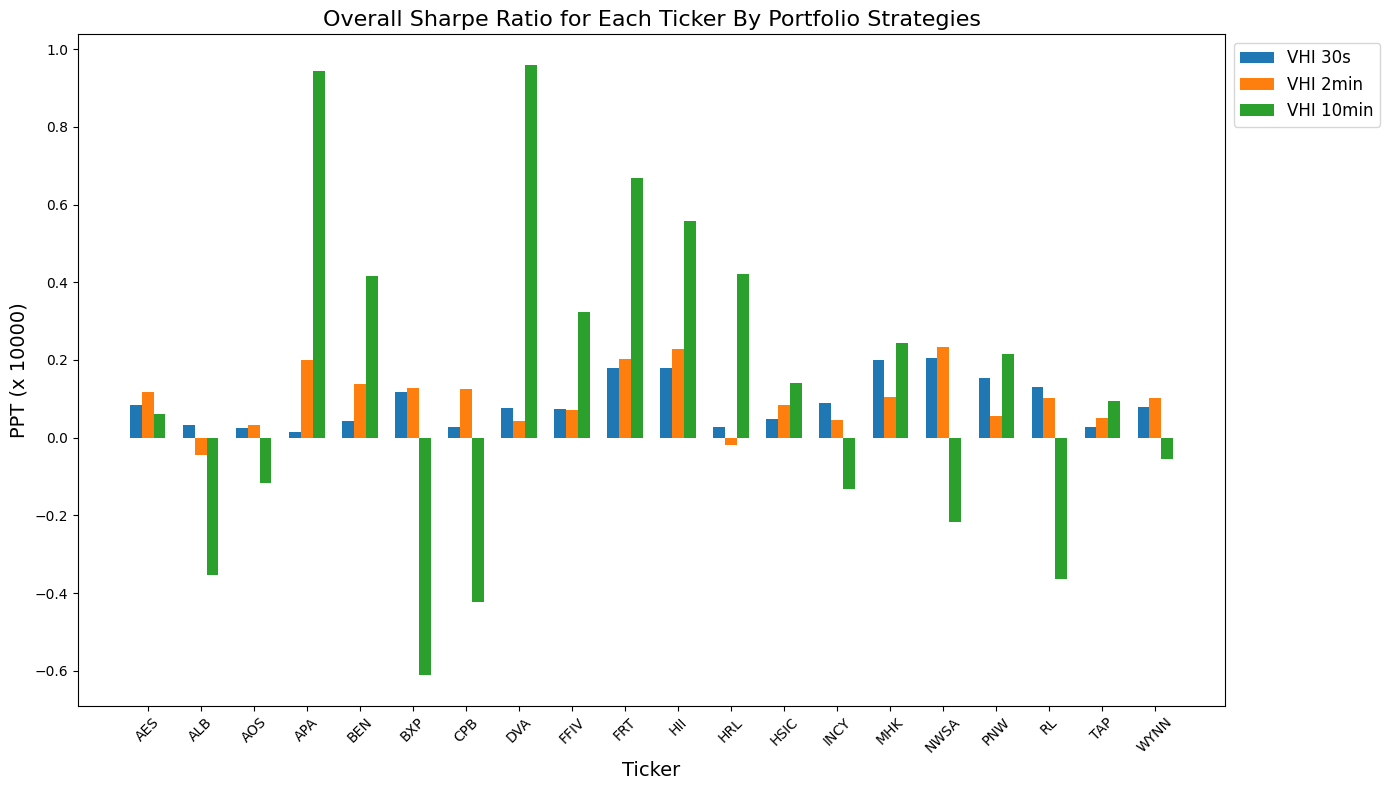

In [20]:
# Plot cumulative PnL for each ticker
plt.figure(figsize=(14, 8))

# Number of series
n_series = len(ticker_PPT_lst_ib)
# Number of tickers
tickers = ticker_PPT_lst_ib[0].index
n_tickers = len(tickers)

# Set width of bars
bar_width = 0.2
# Increase the gap between tickers
gap = 0.3
# Positions of bars on x-axis for each ticker with additional gap
x = np.arange(n_tickers) * (n_series * bar_width + gap)

# Plot each series as a bar with an offset
for i, (PPT_ticker, label) in enumerate(zip(ticker_PPT_lst_ib, label_ib)):
    plt.bar(x + i * bar_width, PPT_ticker.values, width=bar_width, label=label)

# Add title and labels
plt.title('Overall Sharpe Ratio for Each Ticker By Portfolio Strategies', fontsize=16)
plt.xlabel('Ticker', fontsize=14)
plt.ylabel('PPT (x 10000)', fontsize=14)

# Set x-ticks to the center of the grouped bars
plt.xticks(x + bar_width * (n_series - 1) / 2, tickers, rotation=45)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Adjust layout to fit legend
plt.tight_layout()

# Show plot
plt.show()

## Consider Betsizes

In [21]:
ticker_lst = ['AES', 'ALB', 'AOS', 'APA', 'BEN', 'BXP', 'CPB',
                'DVA', 'FFIV', 'FRT', 'HII', 'HRL', 'HSIC', 'INCY',
                'MHK', 'NWSA', 'PNW', 'RL', 'TAP', 'WYNN']

In [22]:

# Define the ticker symbol and the time period
start_date = "2018-01-01"
end_date = "2018-12-31"

avg_USD_vol_lst = []

# Download the historical data for the ticker
for ticker in ticker_lst:
    data = yf.download(ticker, start=start_date, end=end_date)
    # Calculate the USD traded volume (Volume * Close Price)
    data['USD Traded Volume'] = data['Volume'] * data['Close']
    # Calculate the median USD traded volume
    median_usd_traded_volume = data['USD Traded Volume'].median()
    avg_USD_vol_lst.append(median_usd_traded_volume)

ticker_USD_vol = pd.DataFrame({'ticker': ticker_lst, 'avg_USD_vol': avg_USD_vol_lst})

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [23]:
B_t = ticker_USD_vol['avg_USD_vol'].sum()

In [24]:
pnl_lst[0]

,ticker,top_pnl,bottom_pnl,date,overall_pnl
0,AES,-0.002479,-0.007342,2019-01-10,0.004863
1,ALB,0.002176,-0.019678,2019-01-10,0.021853
2,AOS,-0.001181,-0.000240,2019-01-10,-0.000940
3,APA,0.016392,-0.003138,2019-01-10,0.019530
4,BEN,-0.001695,-0.005144,2019-01-10,0.003448
...,...,...,...,...,...
3955,NWSA,-0.000915,-0.000933,2019-10-22,0.000017
3956,PNW,0.006312,-0.005530,2019-10-22,0.011841
3957,RL,0.016745,0.000824,2019-10-22,0.015921
3958,TAP,0.017097,0.002174,2019-10-22,0.014923


In [25]:
pnl_ticker_betsize_lst = []

for pnl, counts in zip(pnl_lst, counts_lst):
    pnl_ticker = pnl.groupby('ticker')[['top_pnl', 'bottom_pnl']].sum()
    pnl_ticker = pnl_ticker.merge(ticker_USD_vol, left_on='ticker', right_on='ticker', how='left')
    pnl_ticker['PnL_betsize'] = (pnl_ticker['top_pnl'] - pnl_ticker['bottom_pnl']) * 0.001 * pnl_ticker['avg_USD_vol']
    pnl_ticker_betsize_lst.append(pnl_ticker)

In [26]:
pnl_betsize = []

for pnl, counts in zip(pnl_lst, counts_lst):
    pnl = pnl.merge(ticker_USD_vol, left_on='ticker', right_on='ticker')
    pnl['PnL'] = (pnl['top_pnl'] - pnl['bottom_pnl']) * 0.001 * pnl['avg_USD_vol']
    pnl_daily = pnl.groupby('date')[['PnL']].sum()

    counts = counts.merge(ticker_USD_vol, left_on='ticker', right_on='ticker')
    counts['B_t_ticker'] = (counts['top_counts'] + counts['bottom_counts']) * counts['avg_USD_vol']
    counts_daily = counts.groupby('date')[['B_t_ticker']].sum()

    pnl_betsize.append(pnl_daily['PnL'].sum() / counts_daily['B_t_ticker'].sum())

pnl_betsize_by_strat = pd.DataFrame({'Strategy': label_lst, 'PPD': pnl_betsize})